In [2]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 : Data loading and Cleaning 

In [3]:
loans = pd.read_csv("loan.csv")

/home/ajay/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loans.shape

(39717, 111)

### Checking for columns with null values

In [7]:
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Alot of columns have all null values. Hence lets drop those columns

In [8]:
loans.dropna(axis=1,how='all',inplace=True)
loans.shape

(39717, 57)

### Lets check the number of unique values in a column

In [9]:
for col in loans:
    print(col,':',len(loans[col].unique()))


id : 39717
member_id : 39717
loan_amnt : 885
funded_amnt : 1041
funded_amnt_inv : 8205
term : 2
int_rate : 371
installment : 15383
grade : 7
sub_grade : 35
emp_title : 28821
emp_length : 12
home_ownership : 5
annual_inc : 5318
verification_status : 3
issue_d : 55
loan_status : 3
pymnt_plan : 1
url : 39717
desc : 26528
purpose : 14
title : 19616
zip_code : 823
addr_state : 50
dti : 2868
delinq_2yrs : 11
earliest_cr_line : 526
inq_last_6mths : 9
mths_since_last_delinq : 96
mths_since_last_record : 112
open_acc : 40
pub_rec : 5
revol_bal : 21711
revol_util : 1090
total_acc : 82
initial_list_status : 1
out_prncp : 1137
out_prncp_inv : 1138
total_pymnt : 37850
total_pymnt_inv : 37518
total_rec_prncp : 7976
total_rec_int : 35148
total_rec_late_fee : 1356
recoveries : 4040
collection_recovery_fee : 2616
last_pymnt_d : 102
last_pymnt_amnt : 34930
next_pymnt_d : 3
last_credit_pull_d : 107
collections_12_mths_ex_med : 2
policy_code : 1
application_type : 1
acc_now_delinq : 1
chargeoff_within_12_

### As we can see above there are some columns with only 1 unique value. We will remove these columns

In [10]:
for col in loans:
    if len(loans[col].unique()) < 2 :
        loans.drop([col],axis=1,inplace=True)
    else : 
        pass

loans.shape

(39717, 51)

### Now lets check for the columns with only 2 values and see if the one is null then lets remove those columns as well

In [11]:
for col in loans:
    if len(loans[col].unique()) == 2:
        if loans[col].isna().sum() > 0:
            loans.drop([col],axis=1,inplace=True)
    else :
        pass

loans.shape

(39717, 48)

### We have compeleted the cleaning of the data and now have only 48 column remaining.

# Step 2 : Lets understand the columns relevent to our analysis and keep only those before we procees further. We will use data dictionary for this purpose

In [12]:
loans_dict =  pd.read_excel('Data_Dictionary.xlsx')
loans_dict = loans_dict[['LoanStatNew','Description']]
loans_dict = loans_dict[loans_dict.LoanStatNew.isna() == False]

### We will now compare data dictionary with the columns present in the loan dataframe and print LoanStatNew and description of the columns present in the loan dataframe

In [13]:
columns_list = []
for col in loans :
    columns_list.append(col)

for value in loans_dict['LoanStatNew'] :
    if value in columns_list :
        pass
    else :
        loans_dict= loans_dict[ loans_dict['LoanStatNew'] != value ]

print(loans_dict.shape)
loans_dict


(48, 2)


,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan...
4,annual_inc,The self-reported annual income provided by th...
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of ...
15,desc,Loan description provided by the borrower
16,dti,A ratio calculated using the borrower’s total ...
18,earliest_cr_line,The month the borrower's earliest reported cre...
19,emp_length,Employment length in years. Possible values ar...
20,emp_title,The job title supplied by the Borrower when ap...
23,funded_amnt,The total amount committed to that loan at tha...


### As we can understand from the above description the below columns provide information post approval and hence we can remove them
- collection_recovery_fee
- delinq_2yrs
- last_pymnt_amnt
- last_pymnt_d
- next_pymnt_d
- mths_since_last_delinq
- mths_since_last_record
- out_prncp
- out_prncp_inv
- recoveries
- revol_bal
- total_pymnt
- total_pymnt_inv
- total_rec_int
- total_rec_late_fee
- total_rec_prncp

### Apart from the above columns following columns are not relevent to us as the do not contribute our analysis : "id", "member_id", "url", "title", "emp_title", "zip_code" and "desc"

In [14]:
loans.drop(["id","member_id", "url", "title", "emp_title", "zip_code","desc","collection_recovery_fee","delinq_2yrs","last_pymnt_amnt","last_pymnt_d","next_pymnt_d","mths_since_last_delinq","mths_since_last_record","out_prncp","out_prncp_inv","recoveries","revol_bal","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","total_rec_prncp"],axis=1,inplace=True)
print(loans.shape)
loans.columns

(39717, 25)


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### Objective of the analysis is to see who is more likely to default and that can be only said for those who have either fully paid or charged off loans.Hence removing the row the current loan status

In [15]:
loans = loans[loans['loan_status'] != "Current"]
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Since we are almost ready to work on our final data lets check for any missing values

In [16]:
(loans.isna().sum()/len(loans.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
last_credit_pull_d      0.005184
pub_rec_bankruptcies    1.806776
dtype: float64

# Step 3 : Handling missing values

In [17]:
(loans.pub_rec_bankruptcies.value_counts()/len(loans.index))*100

0.0    93.936802
1.0     4.243461
2.0     0.012961
Name: pub_rec_bankruptcies, dtype: float64

### 94 % of pub_rec_bankrupticiess are single value we can remove this columns 

In [18]:

loans.drop(['pub_rec_bankruptcies'],axis=1,inplace=True)
print(loans.shape)
(loans.isna().sum()/len(loans.index))*100

(38577, 24)


loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
last_credit_pull_d     0.005184
dtype: float64

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

### Lets check the most common value in emp_length

In [20]:
print("Mode : " + loans.emp_length.mode()[0])
loans.emp_length.value_counts()


Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### From the above value counts mode value is far higher than any other value so lets assign that to our null values 

In [21]:
loans.emp_length.fillna(loans.emp_length.mode()[0], inplace = True)
print(loans.emp_length.isna().sum())
loans.emp_length.unique()

0


array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

### We will now remove the rows from the dataframe where revol_util is Null

In [22]:
loans = loans[loans.revol_util.isna() != True ]
loans.revol_util.isna().sum()

0

### Since the columns have % , + or > lets split them and standardize these columns

In [23]:
loans.int_rate = pd.to_numeric(loans.int_rate.apply(lambda x : x.split('%')[0]))

### For emp_length if it is < 1 year then we will consider it 0 and 10 + years is 10

In [24]:
loans.emp_length = pd.to_numeric(loans.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

### We will remove % from revol_util

In [25]:
loans.revol_util = pd.to_numeric(loans.revol_util.apply(lambda x : x.split('%')[0]))

### Since term is in format with months we will reformat term to have only numeric value of months

In [26]:
loans.term = pd.to_numeric(loans.term.apply(lambda x : x.split()[0]))

In [27]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9,May-16
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,car,GA,1.00,Apr-99,5,3,0,9.4,4,Sep-13
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,small_business,IL,8.72,Nov-01,2,2,0,98.5,10,May-16
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,other,CA,20.00,Feb-96,1,10,0,21.0,37,Apr-16
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,AZ,11.20,Nov-04,3,9,0,28.3,12,Jan-16


# Step 4 : Outlier treament

### We will start with outlier treatment for annual income

<AxesSubplot:>

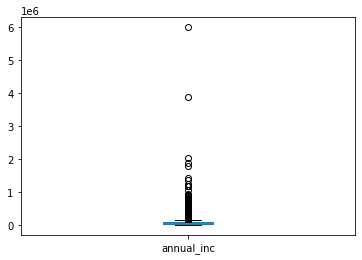

In [27]:
loans.annual_inc.plot.box()

### We can see outliers there clearly so lets remove them

In [28]:
quantile_annual =  loans.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_annual

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

### Huge gap in between 95 and 99 quintile so keeping below 95

<AxesSubplot:>

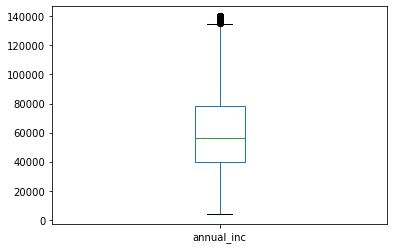

In [29]:
loans = loans[loans.annual_inc <= loans['annual_inc'].quantile(0.95) ]
loans.annual_inc.plot.box()

### Outlier treatment for funded_amnt_inv

<AxesSubplot:>

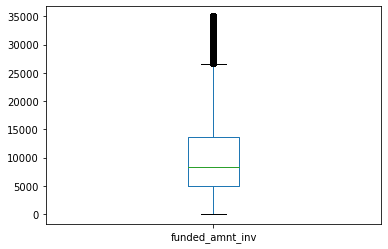

In [30]:
loans.funded_amnt_inv.plot.box()

In [31]:
loans.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

### Since funded_amnt_inv is showing continous distribution so we don't need to remove the high values

## Derived Colums

### a) We will derive the year from the earliest_cr_line as it is given in month-year format

In [32]:
loans["earliest_cr_line_year"] = loans.earliest_cr_line.apply(lambda x: x.split("-")[1])

## Analysis

### 1. Univariate Analysis

###  a) Lets first do a count plot for the loan status

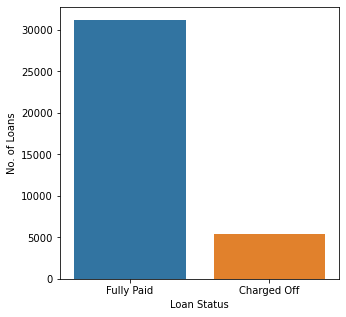

In [125]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=loans)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

### More than 30000 loans are fully paid and around 5000 loans are in charged off.

### b) Count plot grade

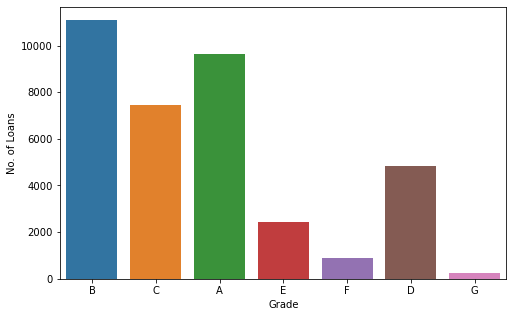

In [126]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="grade", data=loans)
ax.set(xlabel='Grade', ylabel='No. of Loans')
plt.show()

### Most of the loans were given to Grade A, B, C and the lowest loans given to garde G

### c) Annual Income

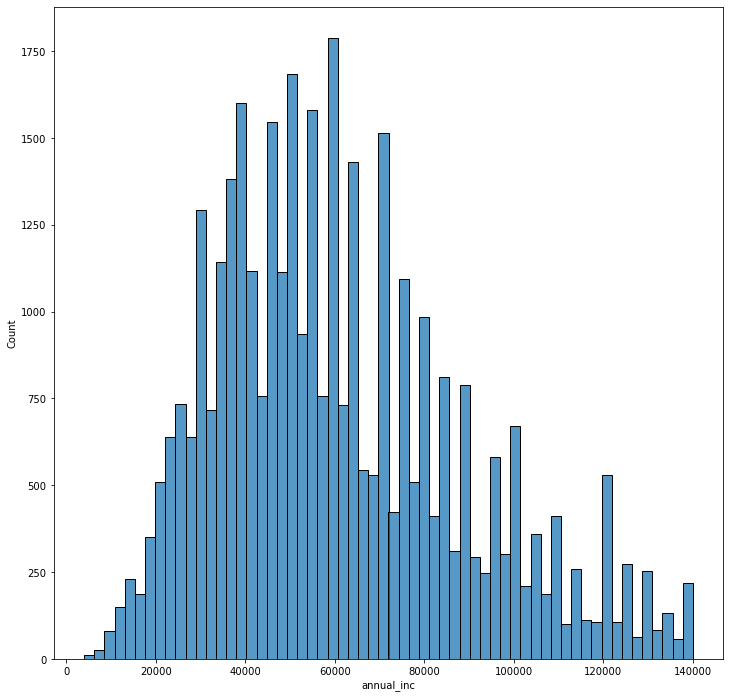

In [35]:
plt.figure(figsize=(12,12))
sns.histplot(data=loans, x="annual_inc")
plt.show()

In [36]:
loans.annual_inc.agg(['min', 'mean', 'max'])

min       4000.000000
mean     60890.563839
max     140004.000000
Name: annual_inc, dtype: float64

### Average annual income of the applicant is 60890 with 4000 the minimum annual income and 140004 the maximum income

### d) Interest Rate

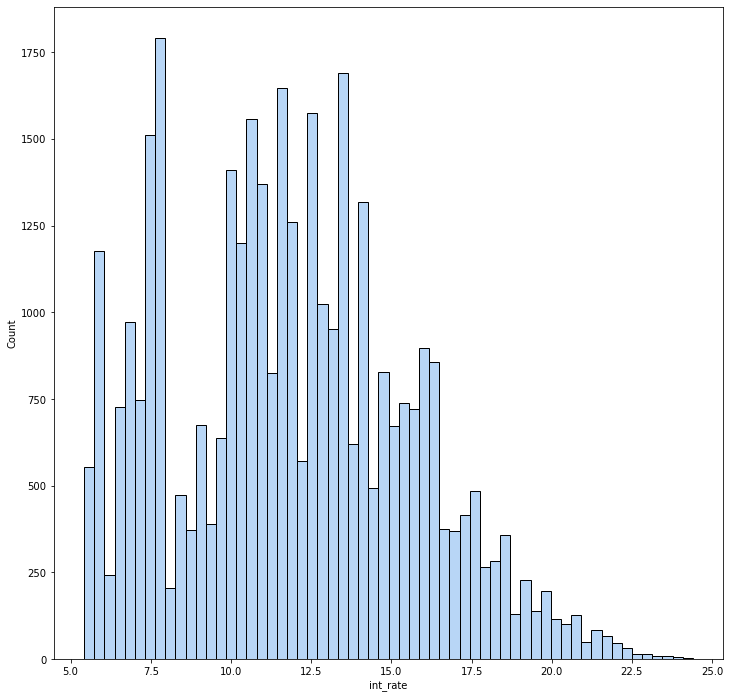

In [62]:
plt.figure(figsize=(12,12))
sns.set_palette('pastel')
sns.histplot(data=loans, x="int_rate")
plt.show()

In [44]:
loans.int_rate.agg(['min', 'mean', 'max'])

min      5.420000
mean    11.883216
max     24.400000
Name: int_rate, dtype: float64

### Average interest rate for the applicant is 11.8 with 5.42 the minimum interest rate and 24.4 the maximum interest rate

### e) Home owership for charged off loans

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

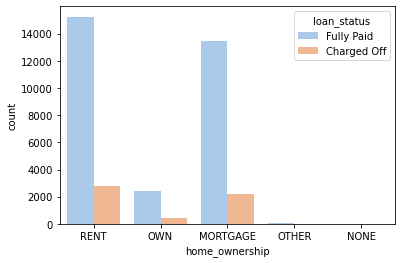

In [133]:
fig, ax = plt.subplots(figsize = (6,4))
sns.set_palette('pastel')
sns.countplot(x='home_ownership', hue='loan_status' , data=loans)

### Maximum charged off loans came from the people who have RENT as howe ownership

### f) Employement length of the charged off loans.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

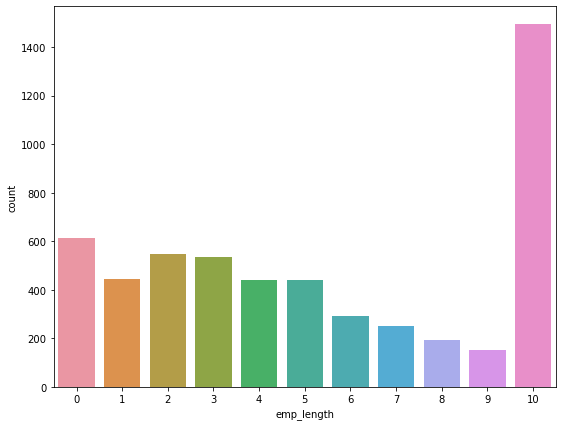

In [58]:
fig, ax = plt.subplots(figsize = (9,7))
sns.countplot(x='emp_length', data=loans[loans['loan_status']=='Charged Off'])

### Maximum number of the charged off loans came from the applicants who have employement length of 10 years or more

### g) Verification Status of the charged off loans

<AxesSubplot:xlabel='verification_status', ylabel='count'>

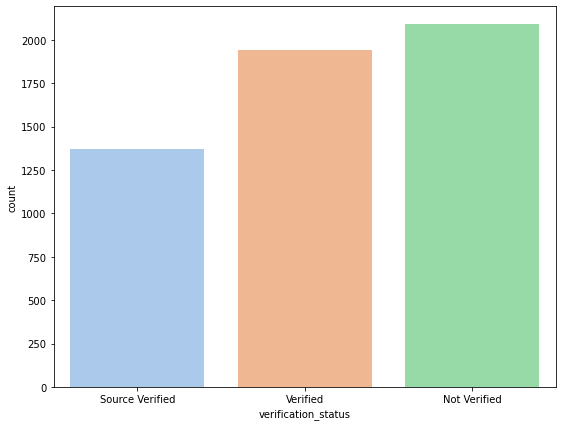

In [63]:
fig, ax = plt.subplots(figsize = (9,7))
sns.countplot(x='verification_status', data=loans[loans['loan_status']=='Charged Off'])

### Maximum number of charged off loans came from applicants who are not verified.

### h) Purpose of the loans

<AxesSubplot:xlabel='purpose', ylabel='count'>

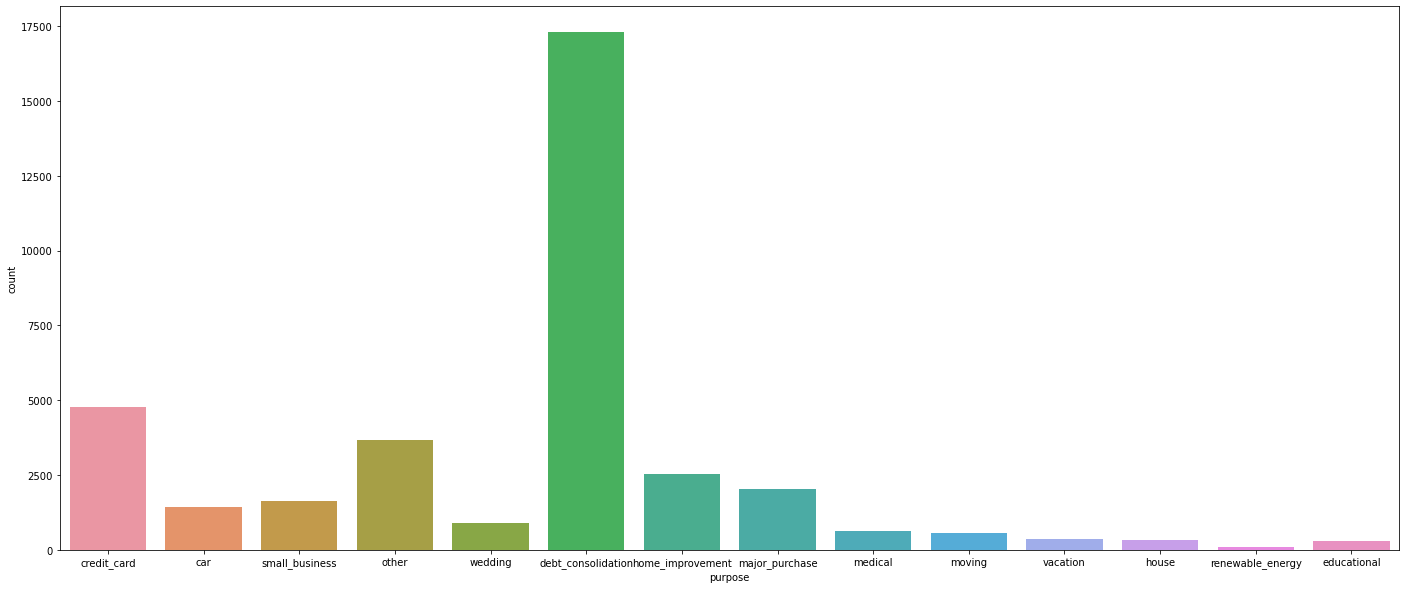

In [142]:
fig, ax = plt.subplots(figsize = (24,10))
sns.countplot(x='purpose', data=loans)

### There is huge increase in loans for the purpose of debt consolidation. Maxmimum people are taking loans for debt consolidation

### i) Total monthly Debt to Total monthly income ratio (dti)

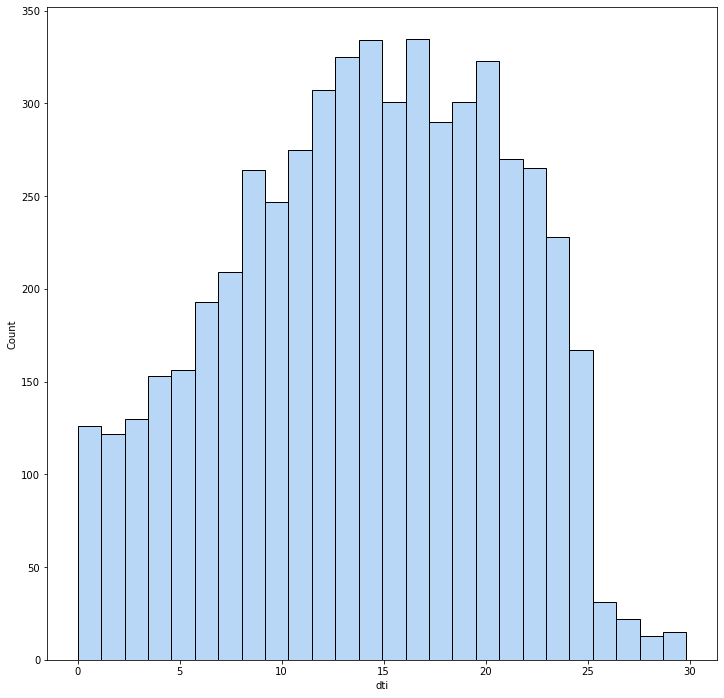

In [70]:
plt.figure(figsize=(12,12))
sns.histplot(data=loans[loans['loan_status']=='Charged Off'], x="dti")
plt.show()

In [71]:
loans[loans['loan_status']=='Charged Off'].dti.agg(['min', 'mean', 'max'])

min      0.0000
mean    14.1105
max     29.8500
Name: dti, dtype: float64

### Maximum number of charged off loans are coming for the dti value ranging from 11 to 21.

### j) earliest_cr_line_year for the charged off loans.

<AxesSubplot:xlabel='earliest_cr_line_year', ylabel='count'>

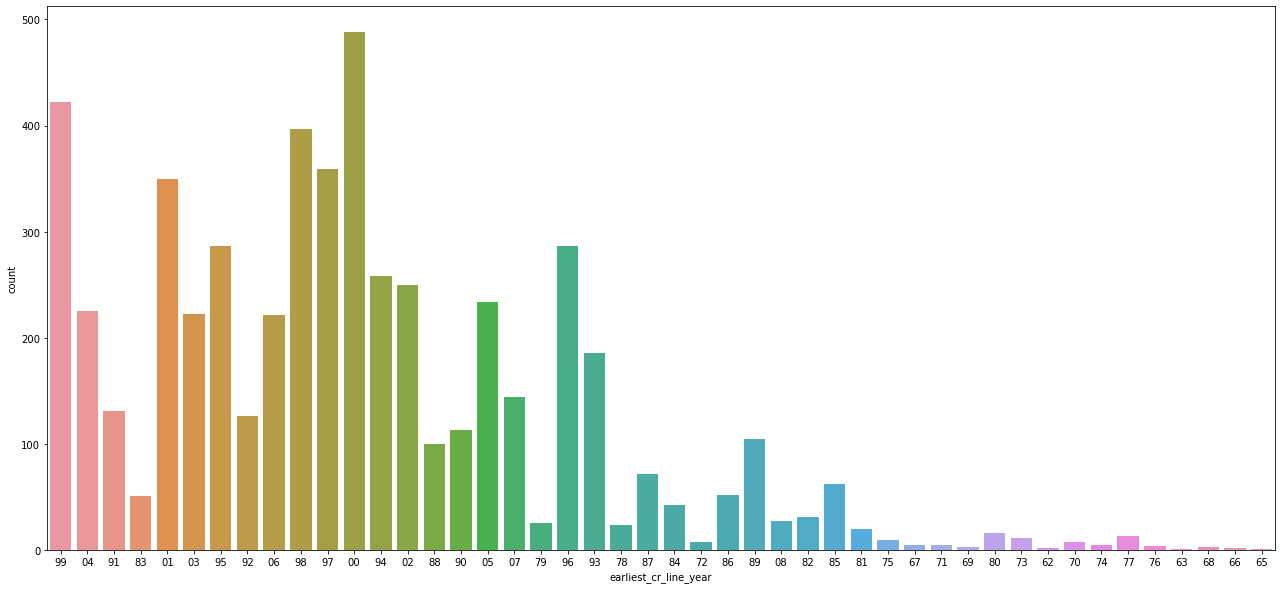

In [72]:
fig, ax = plt.subplots(figsize = (22,10))
sns.countplot(x='earliest_cr_line_year', data=loans[loans['loan_status']=='Charged Off'])

### Maximum number of the charged off loans has earliest_cr_line_year as 2000

### h) inq_last_6mths for the charged off loans

<AxesSubplot:xlabel='inq_last_6mths', ylabel='Count'>

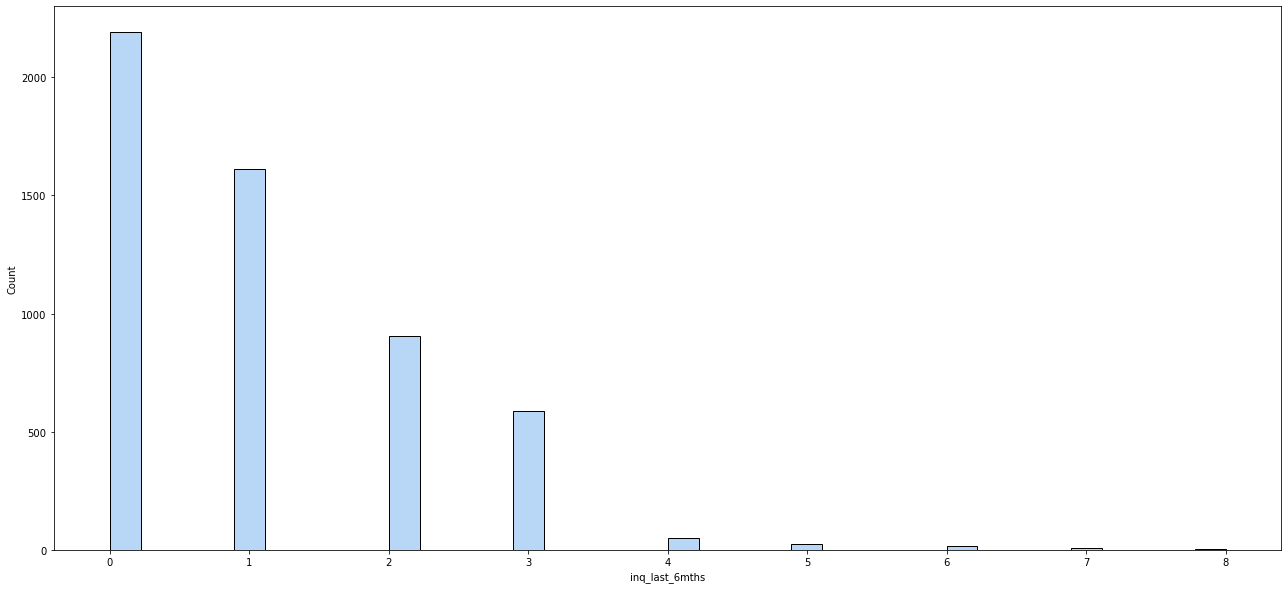

In [73]:
fig, ax = plt.subplots(figsize = (22,10))
sns.histplot(x='inq_last_6mths', data=loans[loans['loan_status']=='Charged Off'])

### Most of the charged off loans comes for 0 inq_last_6mnths

### i) open_acc for the charged off loans

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

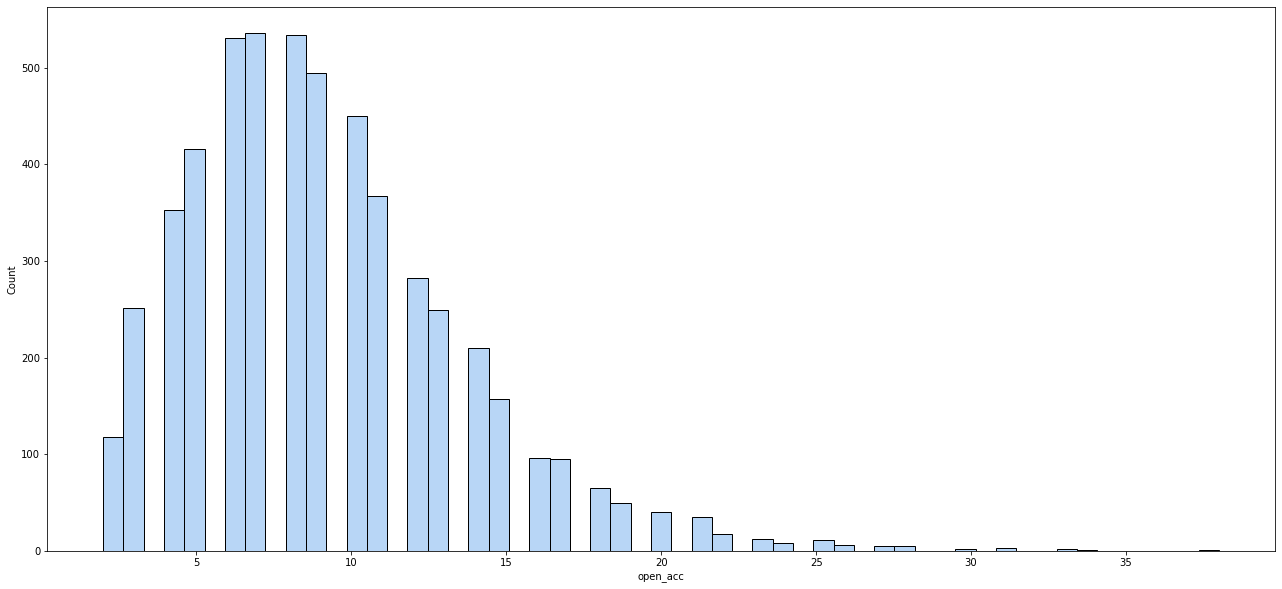

In [75]:
fig, ax = plt.subplots(figsize = (22,10))
sns.histplot(x='open_acc', data=loans[loans['loan_status']=='Charged Off'])

### Most of the charged off loans have open_acc between 5 and 10

### j) revol_util for the charged off loans

<AxesSubplot:xlabel='revol_util'>

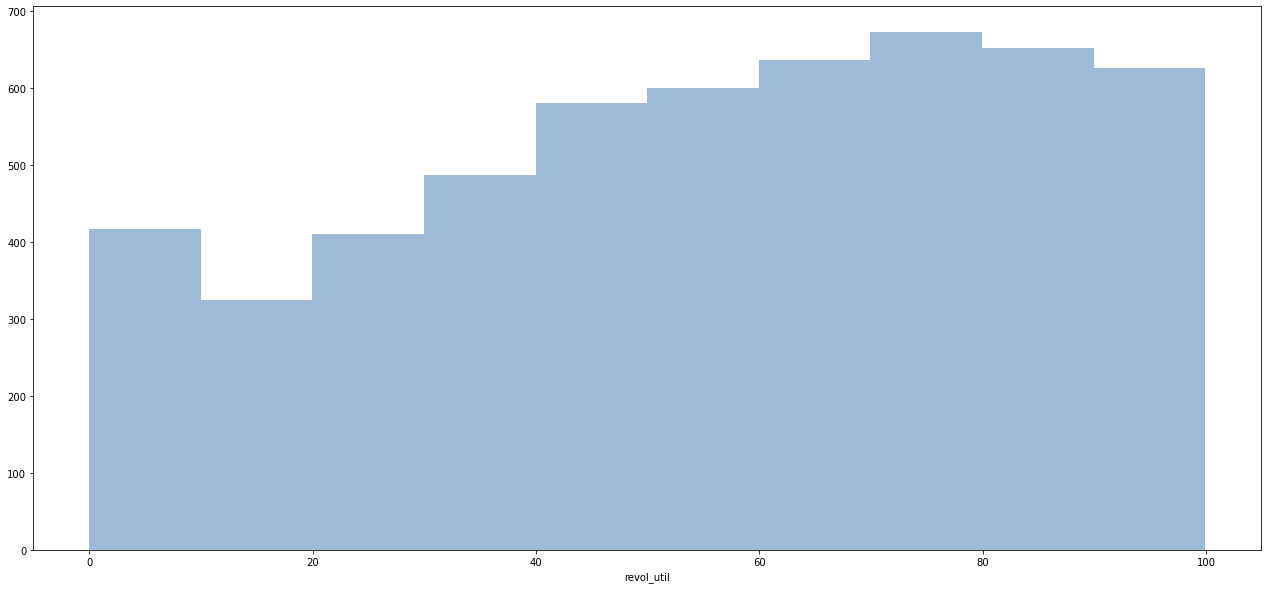

In [82]:
fig, ax = plt.subplots(figsize = (22,10))
sns.set_palette('Blues_r')
sns.distplot(loans[loans['loan_status']=='Charged Off']['revol_util'], bins=10, kde=False)

### Most of the charged off loans comes for the revol util range between 70 to 90 %

### 2. Bivariate Analysis

In [99]:
def bivariate_prob(df,col,stacked= True):
    plotCrosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    plotCrosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    plotCrosstab = crosstab

    linePlot = plotCrosstab[['Percentage_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

### a) Loan Status vs Loan Amount of loans

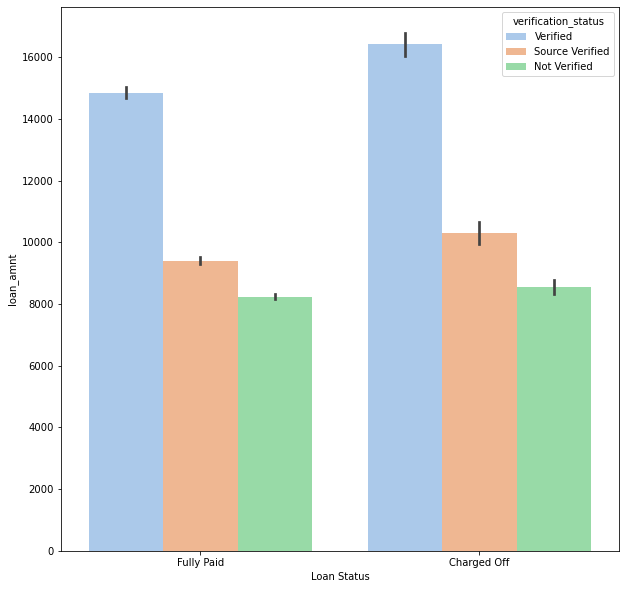

In [146]:
plt.figure(figsize=(10,10))
sns.set_palette('pastel')
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loans)
plt.xlabel("Loan Status")
plt.show()

### Most of loans are charged off where verification status is Verified.

### b) term-wise distribution of charged-off and fully paid loans vs loan amount

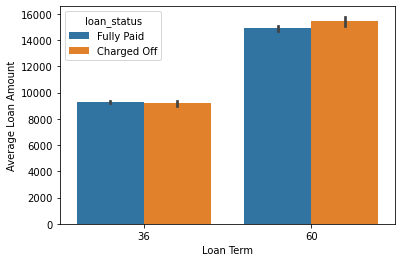

In [90]:
ax = sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loans, estimator=np.mean)
ax.set(xlabel='Loan Term', ylabel='Average Loan Amount')
plt.show()

### The average loan amount is similar for both the terms for both loan status.
### The average loan amount is higher for the 60 month term.

### c) Purpose of loan w.r.t % of loans charged off and no. of loan applicants

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
purpose,,,,
car,158,1288,1446,10.927
credit_card,518,4264,4782,10.832
debt_consolidation,2672,14621,17293,15.451
educational,54,255,309,17.476
home_improvement,319,2232,2551,12.505
house,55,283,338,16.272
major_purchase,216,1825,2041,10.583
medical,103,536,639,16.119
moving,90,458,548,16.423


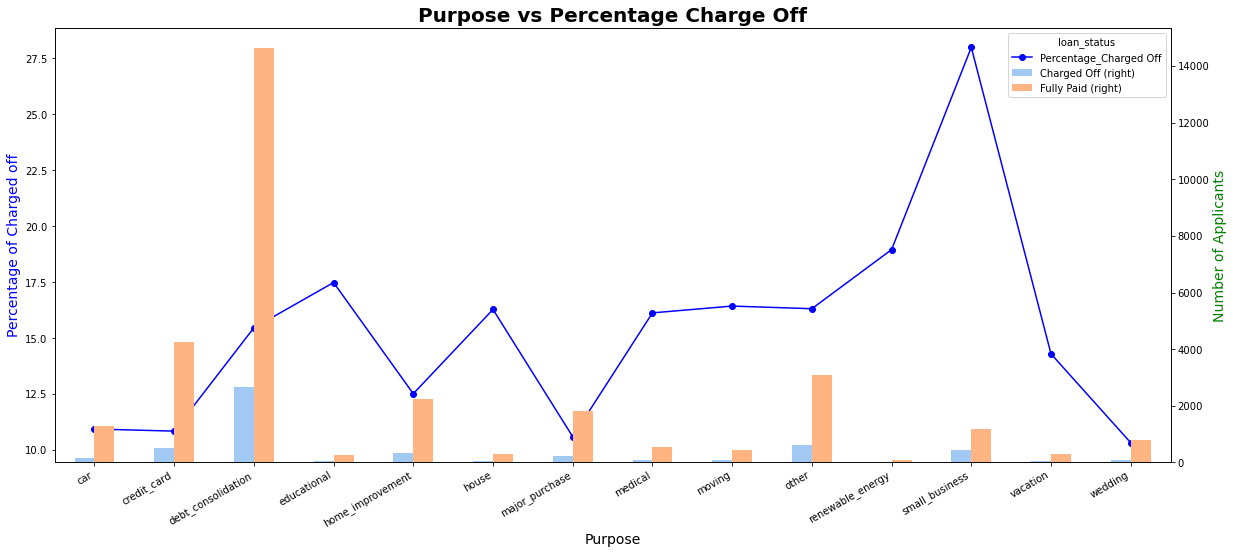

In [138]:
sns.set_palette('pastel')
crosstab = pd.crosstab(loans['purpose'], loans['loan_status'],margins=True)
crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
crosstab = crosstab[0:-1]
display(crosstab)
bivariate_prob(df=loans, col="purpose", stacked=False)

### Maximum no. of loans i.e. 17293 are accepted for the purpose of Debt Consolidation out of which 14621 are fully paid and 2672 are charged off i.e. 15.2%
### Maximum % of a loan being charged off is for the purpose of small business and the % is 27.5.

### d) Loan amount w.r.t % of loans charged off and no. of loan applicants

In [103]:
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000' , '30000 and above']
loans['loan_amnt_range'] = pd.cut(loans['loan_amnt'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
loan_amnt_range,,,,
0-5000,1290,7997,9287,13.890
5000-10000,1601,10811,12412,12.899
10000-15000,1027,6298,7325,14.020
15000-20000,722,3330,4052,17.818
20000-25000,485,1928,2413,20.099
25000-30000,123,455,578,21.280
30000 and above,154,385,539,28.571


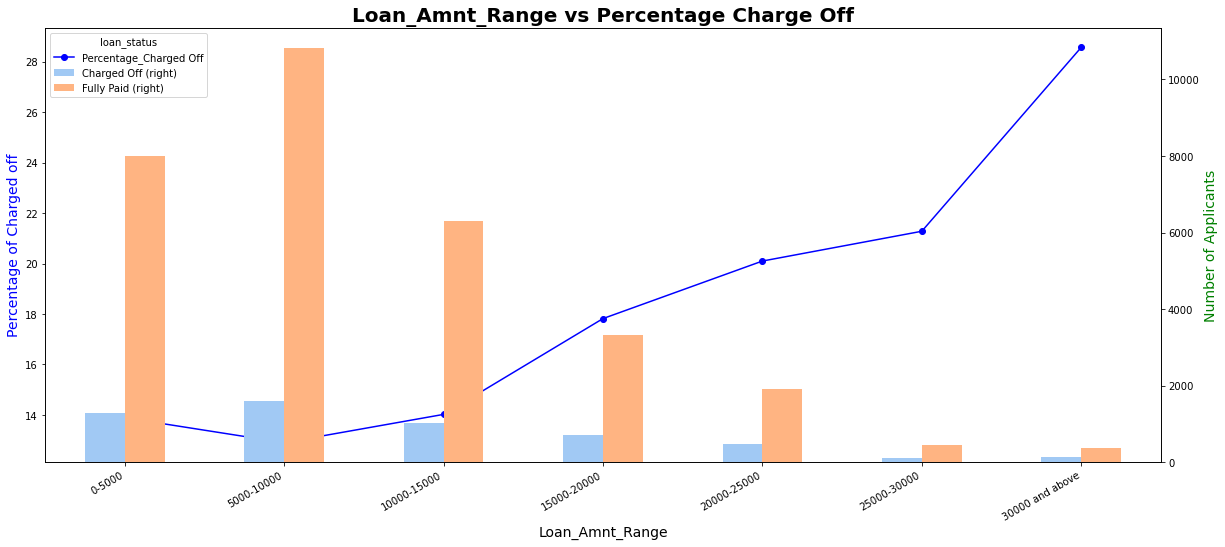

In [147]:
crosstab = pd.crosstab(loans['loan_amnt_range'], loans['loan_status'],margins=True)
crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
crosstab = crosstab[0:-1]
display(crosstab)
bivariate_prob(df=loans, col="loan_amnt_range", stacked=False)

### As the loan amount increases, The probablity of loan being charged off increases. It is maximum, 29.47% for the amount of 30,000+
### The maximum no. of loans, 12410 are applied where the loan amount ranges between 5000 and 10000.

### e)Annual Income Range w.r.t % of loans charged off and no. of loan applicants

In [107]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loans['annual_inc_range'] = pd.cut(loans['annual_inc'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
annual_inc_range,,,,
0-25000,481,2050,2531,19.004
25000-50000,2117,10699,12816,16.518
50000-75000,1685,9980,11665,14.445
75000-100000,736,5301,6037,12.191
100000 and above,383,3174,3557,10.768


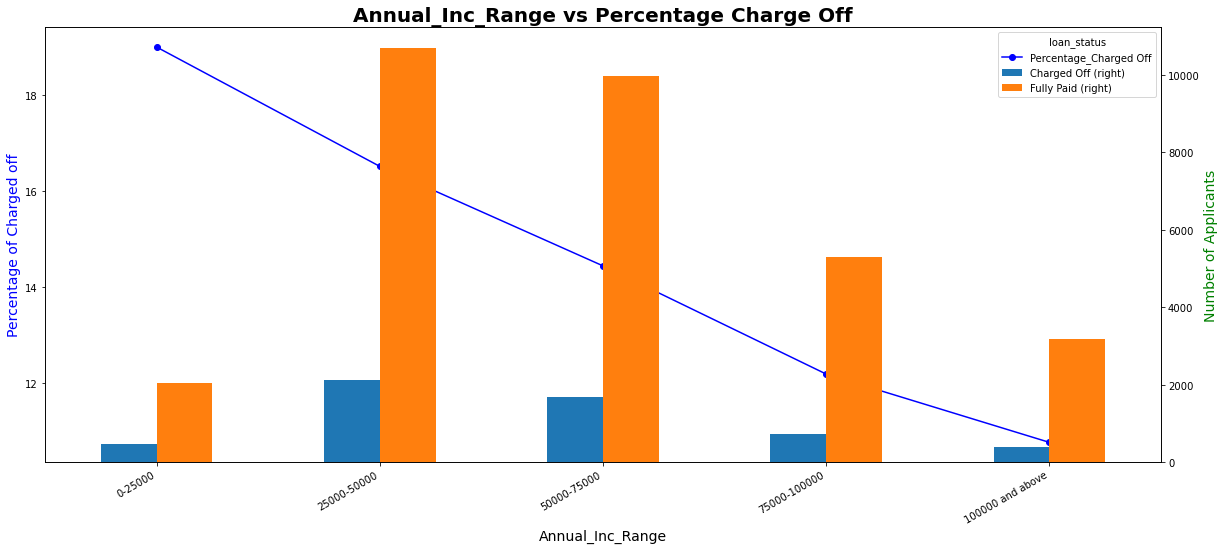

In [120]:
crosstab = pd.crosstab(loans['annual_inc_range'], loans['loan_status'],margins=True)
crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
crosstab = crosstab[0:-1]
display(crosstab)
bivariate_prob(df=loans, col="annual_inc_range", stacked=False)

### As the Annual Income is increasing, The % of loan getting charged off is decreasing.It is minimum for income more than 100000 and maximum where annual income less than 25000.
### Maximum loans are applied by applicants whose annual income is between 25000 and 75000.

### f)Interest Rate w.r.t % of loans charged off and no. of loan applicants

In [109]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loans['int_rate_range'] = pd.cut(loans['int_rate'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
int_rate_range,,,,
0-7.5,254,4907,5161,4.922
7.5-10,558,6105,6663,8.375
10-12.5,1193,7707,8900,13.404
12.5-15,1434,7023,8457,16.956
15 and above,1697,5058,6755,25.122


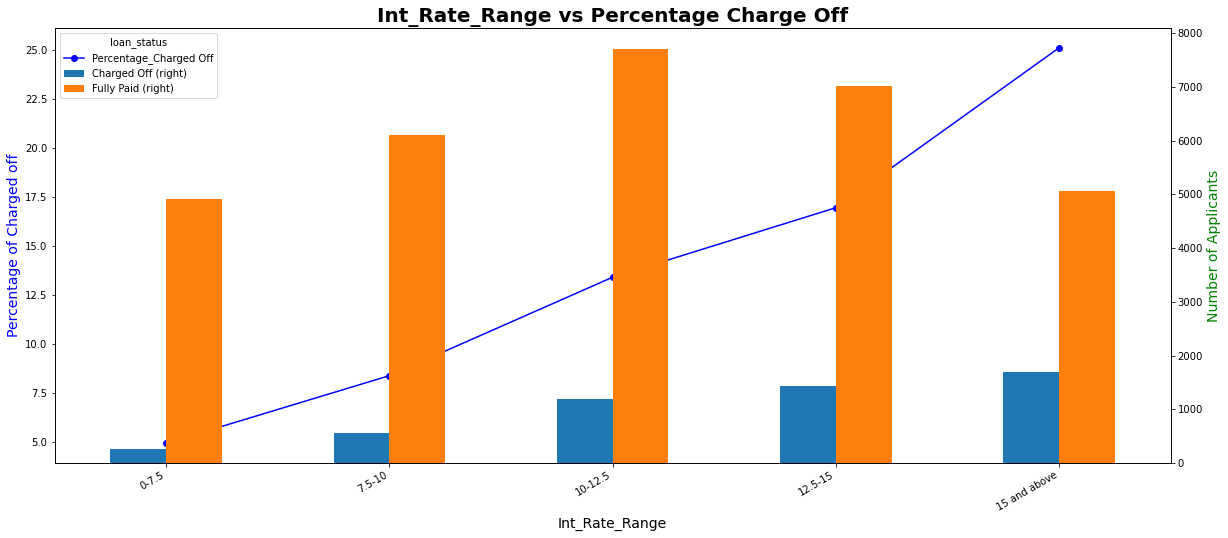

In [110]:
crosstab = pd.crosstab(loans['int_rate_range'], loans['loan_status'],margins=True)
crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
crosstab = crosstab[0:-1]
display(crosstab)
bivariate_prob(df=loans, col="int_rate_range", stacked=False)

### As the Interest Rate is increasing, The % of loan getting charged off is also increasing.It is minimum for interest rate below 7.5.
### Maximum loans are applied by applicants where the interest rate is between 10 and 15%.

### g)Grade w.r.t % of loans charged off and no. of loan applicants

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
grade,,,,
A,593,9053,9646,6.148
B,1376,9720,11096,12.401
C,1321,6146,7467,17.691
D,1077,3743,4820,22.344
E,656,1781,2437,26.918
F,286,595,881,32.463
G,93,166,259,35.907


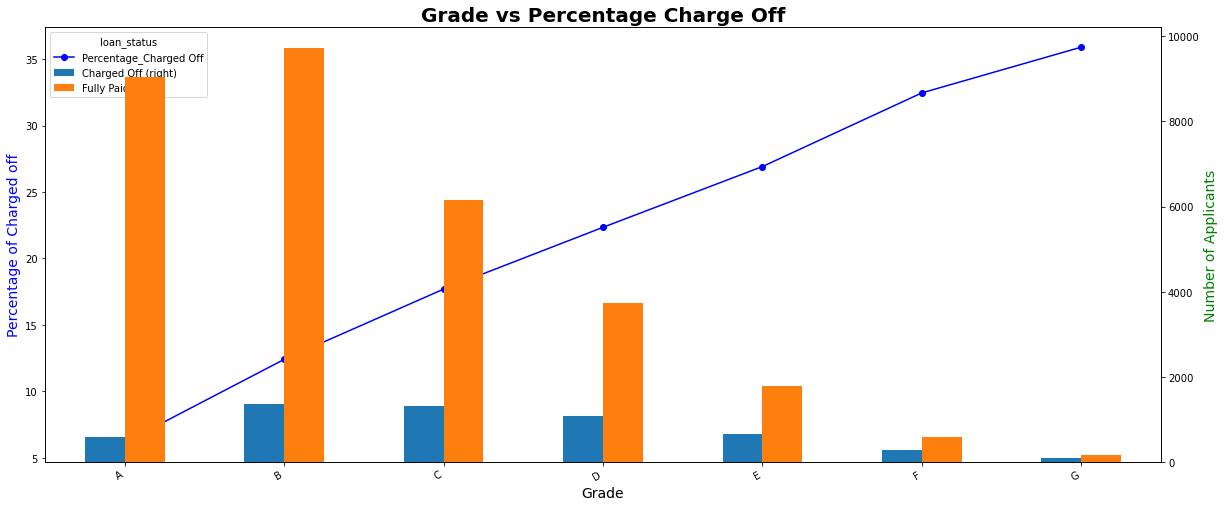

In [132]:
crosstab = pd.crosstab(loans['grade'], loans['loan_status'],margins=True)
crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
crosstab = crosstab[0:-1]
display(crosstab)
bivariate_prob(df=loans, col="grade", stacked=False)

### Grade A and B loans have less percentage of charged off loans as compared to others.
### Grade E, F, G loans have more percentage of charged off loans as compared to others.

### h) Term w.r.t % of loans charged off and no. of loan applicants

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
term,,,,
36,3101,24575,27676,11.205
60,2301,6629,8930,25.767


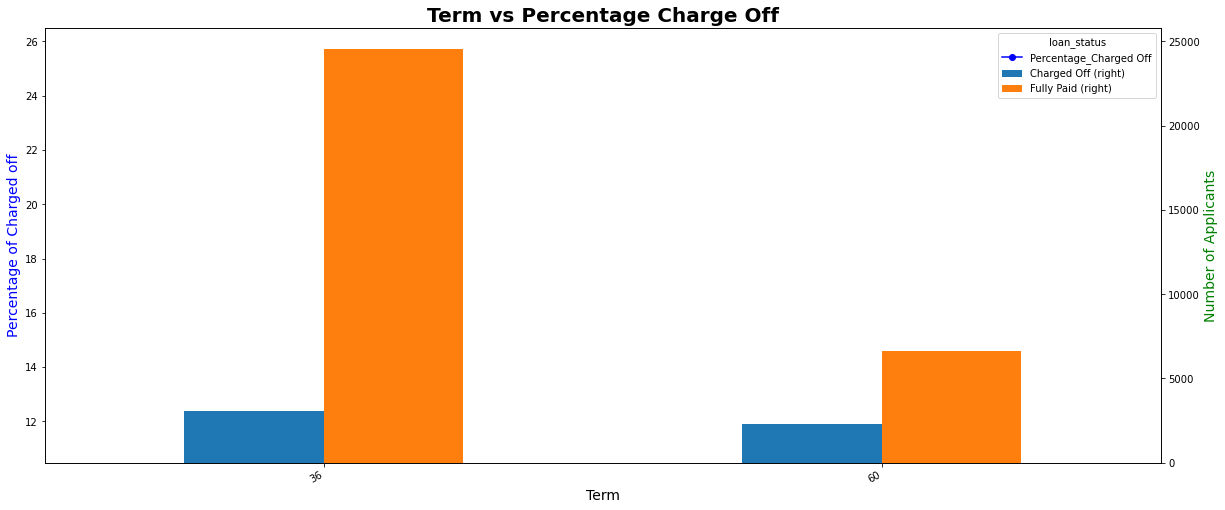

In [121]:
crosstab = pd.crosstab(loans['term'], loans['loan_status'],margins=True)
crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
crosstab = crosstab[0:-1]
display(crosstab)
bivariate_prob(df=loans, col='term', stacked=False)

### Loans with term of 60 months have 25.7 % of charged off loans

### i) Address State w.r.t % of loans charged off and no. of loan applicants

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
addr_state,,,,
AK,13,58,71,18.310
AL,51,371,422,12.085
AR,26,202,228,11.404
AZ,116,692,808,14.356
CA,1072,5482,6554,16.356
CO,96,645,741,12.955
CT,91,581,672,13.542
DC,13,181,194,6.701
DE,11,97,108,10.185


count    50.000000
mean     14.283320
std       8.021679
min       0.000000
25%      12.324250
50%      13.658500
75%      16.122500
max      60.000000
Name: Percentage_Charged Off, dtype: float64


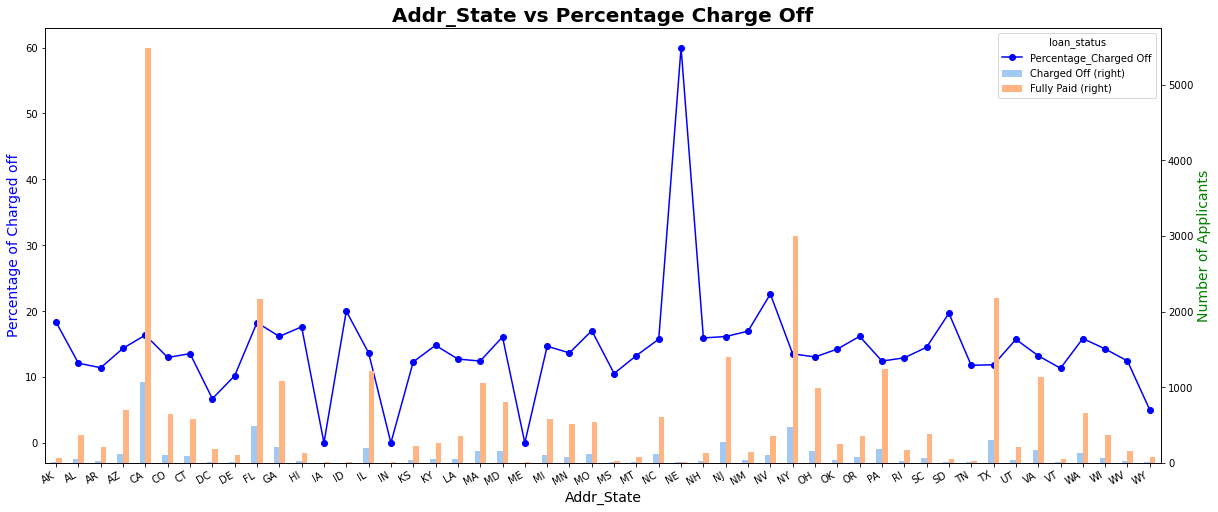

In [154]:
crosstab = pd.crosstab(loans['addr_state'], loans['loan_status'],margins=True)
crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
crosstab = crosstab[0:-1]
display(crosstab)
print(crosstab['Percentage_Charged Off'].describe())
bivariate_prob(df=loans, col='addr_state', stacked=False)

In [28]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9,May-16
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,car,GA,1.00,Apr-99,5,3,0,9.4,4,Sep-13
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,small_business,IL,8.72,Nov-01,2,2,0,98.5,10,May-16
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,other,CA,20.00,Feb-96,1,10,0,21.0,37,Apr-16
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,AZ,11.20,Nov-04,3,9,0,28.3,12,Jan-16


### Maximum no. of loans are applied by people from CA.
### Maximum no. of loans are charged off for people of NV.

### j) Trend of Interest rate of fully paid and charged off loans across purpose

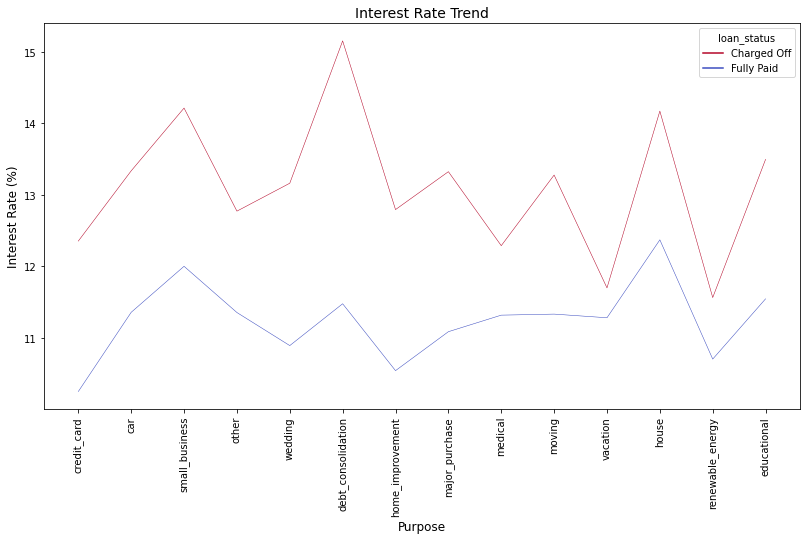

In [123]:
fig = plt.figure(figsize=(15,15))
cmap = plt.cm.coolwarm_r
ax3 = fig.add_subplot(212)
by_interest = loans.groupby(['purpose', 'loan_status']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Interest Rate Trend', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)
ax3.set_xlabel('Purpose', fontsize=12)


# get the values we want displayed as tick labels
tick_labels = tuple(loans['purpose'].unique())
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max), tick_labels, rotation=90) 
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))
for line in ax3.lines:
    line.set_linewidth(0.5)

### Interest Rate is higher for charged off loans across all purposes.

## Correlation Matrix
### Let's find the correlation between the variables/columns of out data set.

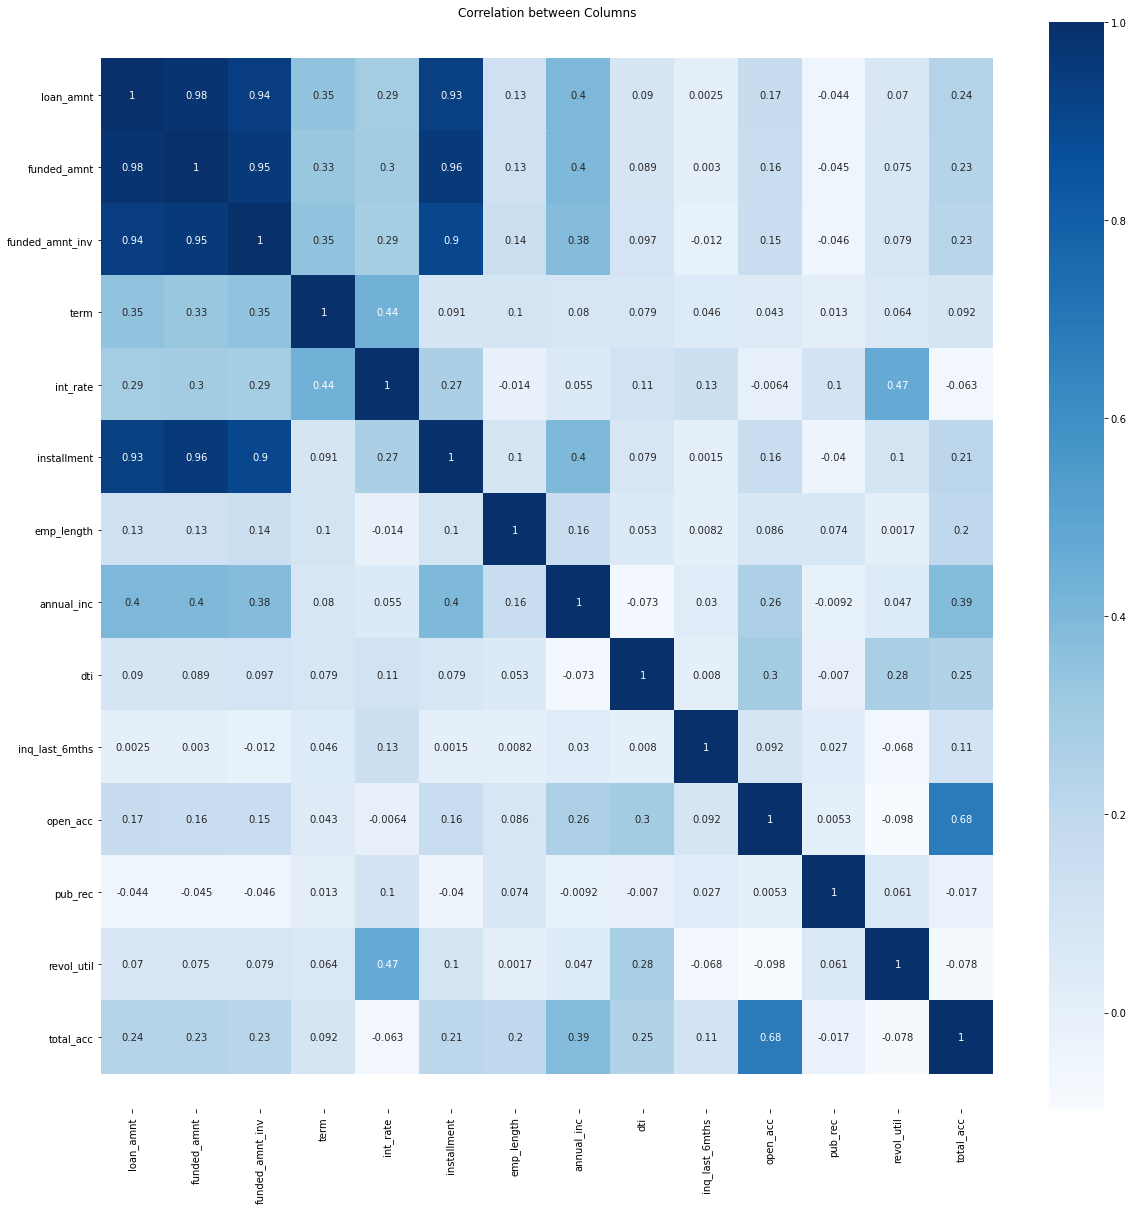

In [124]:
corr_matrix = loans.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

### Interest rates are high for people with high revol utilisation.